### ADMM

In [1]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(70) #for reproducibility

**Minimize:**
$ f(\mathbf{x}) = \mathbf{x}^T P \mathbf{x} + \mathbf{q}^T \mathbf{x} $

**Subject to:**
$ A\mathbf{x} \leq \mathbf{b} $

**Where:**\
$ \mathbf{x} \in \mathbb{R}^{Nx} $ \
$ P \in \mathbb{R}^{Nx \times Nx} $ \
$ \mathbf{q} \in \mathbb{R}^{Nx} $ \
$ A \in \mathbb{R}^{Nb \times Nx} $ \
$ \mathbf{b} \in \mathbb{R}^{Nb} $

In [2]:
Nx = 500 # Size of input vector x
Nb = 250 # Size of b
roh = 1
A = np.random.normal(0, 1, (Nb, Nx)) # Mean=0, Stddev=1, Shape=(Nb,Nx)
print(A.shape)

(250, 500)


In [3]:
P_temp = np.random.normal(0, 1, (Nx, Nx))
P = np.dot(P_temp.T, P_temp) # Forces P to be positive semi definite
print(P.shape)

(500, 500)


In [4]:
q = np.random.normal(0, 1, Nx)
b = np.random.normal(0, 1, Nb)
x_init = np.random.normal(0, 1, Nb)
lambd_init = np.random.rand(Nb) # Uniform distribution range [0,1)

### Standard ADMM

In [5]:
x = x_init
lambd = lambd_init
primal_res = []
dual_res = []
iters = np.arange(0, 800) # max number of iterations

cached_inv = np.linalg.inv((P + roh*np.matmul(A.T, A)))

for k in iters:
    u = np.matmul(cached_inv, np.dot(A.T, lambd+roh*x) - q) # u-update
    x_prev = x
    x = np.minimum(np.dot(A, u) - (lambd/roh), b) # v-update
    lambd = lambd + roh*(x - np.dot(A, u)) # lambda-update

    primal_res.append(np.linalg.norm(x - np.dot(A, u), 2))
    dual_res.append(np.linalg.norm(-roh*np.matmul(A.T, x - x_prev), 2))

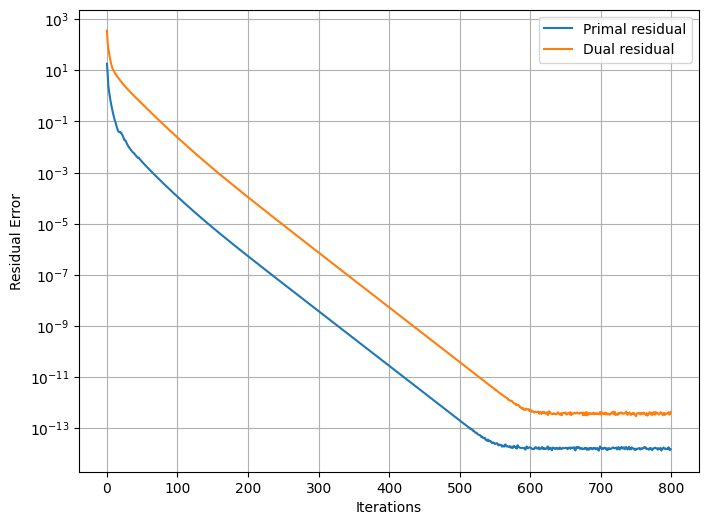

In [6]:
plt.figure(figsize=(8,6))
plt.plot(primal_res, label="Primal residual")
plt.plot(dual_res, label="Dual residual")
plt.yscale("log")
plt.xlabel("Iterations")
plt.ylabel("Residual Error")
plt.legend()
plt.grid()

In [7]:
print('hello world')

hello world


In [8]:
print("hello darkness")

hello darkness
